<a href="https://colab.research.google.com/github/toinnn/Docket_Processo_Seletivo/blob/master/Docket_Processo_Alex_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_40 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 74, 74, 32)        9248      
                                                                 
 activation_41 (Activation)  (None, 74, 74, 32)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 1.1506 - accuracy: 0.1875
Epoch 2/15
1/1 [==============================] - 2s 2s/step - loss: 8.6672 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 1s 1s/step - loss: 24.3660 - accuracy: 0.1875
Epoch 4/15
1/1 [==============================] - 1s 1s/step - loss: 13.4060 - accuracy: 0.2500
Epoch 5/15
1/1 [==============================] - 1s 1s/step - loss: 23.2082 - accuracy: 0.3125
Epoch 6/15
1/1 [==============================] - 2s 2s/step - loss: 4.1473 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 1s 1s/step - loss: 5.5558 - accuracy: 0.3750
Epoch 8/15
1/1 [==============================] - 1s 1s/step - loss: 2.7232 - accuracy: 0.3750
Epoch 9/15
1/1 [==============================] - 1s 923ms/step - loss: 2.5547 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 1s 1s/step - loss: 1.1205 - accuracy: 0.6875
Epoch 11/15
1/1 [==========================

KeyError: ignored

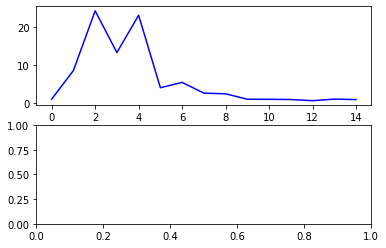

In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt


train_Path = "/content/drive/MyDrive/Github_Dir/Docket_Processo/Dataset/Simplest/Train"
test_Path  = "/content/drive/MyDrive/Github_Dir/Docket_Processo/Dataset/Simplest/Test"


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( 150, 150 , 3) ))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2) , padding = 'same' ))

model.add(Conv2D(32, (3, 3) , padding = 'same'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2) , padding ='same'))

model.add(Conv2D(64, (3, 3) , padding = 'same'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2) , padding = 'same' ))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

model.compile( loss = 'categorical_crossentropy' , optimizer = 'rmsprop' , metrics = ['accuracy'] )

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_Path ,  # this is the target directory
        target_size=(150, 150) ,  # all images will be resized to 150x150
        batch_size=batch_size )# , class_mode = 'binary' )  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        test_Path ,
        target_size=(150, 150) , batch_size = batch_size , )#class_mode = 'binary')

model.fit_generator(
        train_generator,
        steps_per_epoch = 20 // batch_size,#2000
        epochs = 15 ,
        validation_data=validation_generator ,
        validation_steps = 4 // batch_size)#432

#Plotting the training and validation loss
print(model.history.history.keys())
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()        
